In [151]:
import cv2

img = cv2.imread('./data/sportimages/basket/basket2_0001.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

21 28 3 3


# Convolutional Neural Networks

# Importar Librerías

In [152]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [153]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [154]:
# Linux
# dirname = os.path.join(os.getcwd(),'./data/sportimages/')

# MacOS
dirname = os.path.join(os.getcwd(),'/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages')
imgpath = dirname + os.sep

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/
/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/golf 1


<>:18: SyntaxWarning: invalid escape sequence '\.'
<>:18: SyntaxWarning: invalid escape sequence '\.'
/var/folders/9h/yhc2rb056v51gk9rgvs2s6540000gn/T/ipykernel_17282/94205818.py:18: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/basket 9767
/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/tenis 8823
/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/natacion 8937
/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/ciclismo 5172
/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/beisball 7533
/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/futbol 7752
/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/americano 7617
/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/f1 9348
/Users/angeld/MyCode/ITM-2025-IA/projects/20251015_cnn/data/sportimages/boxeo 5053
Directorios leidos: 10
Imagenes en cada directorio [9768, 8823, 8937, 5172, 7533, 7752, 7617, 9348, 5053, 7124]
suma Total de imagenes en subdirs: 77127


# Creamos las etiquetas

In [155]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  77127


In [156]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 golf
1 basket
2 tenis
3 natacion
4 ciclismo
5 beisball
6 futbol
7 americano
8 f1
9 boxeo


In [157]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


# Creamos Sets de Entrenamiento y Test

In [158]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (61701, 21, 28, 3) (61701,)
Testing data shape :  (15426, 21, 28, 3) (15426,)


Text(0.5, 1.0, 'Ground Truth : 4')

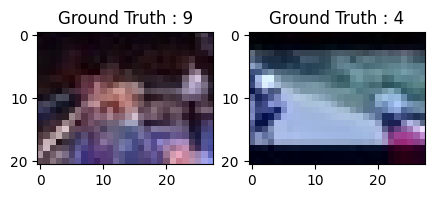

In [159]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

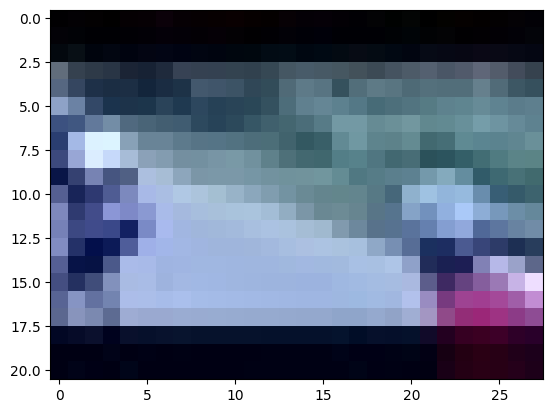

In [160]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [161]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [162]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [163]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(49360, 21, 28, 3) (12341, 21, 28, 3) (49360, 10) (12341, 10)


# Creamos el modelo de CNN

In [164]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 80 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [165]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))


sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

/Users/angeld/MyCode/ITM-2025-IA/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/angeld/MyCode/ITM-2025-IA/venv/lib/python3.13/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [166]:
sport_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 21, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 21, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │       157,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,954 (620.91 KB)

 Trainable params: 158,954 (620.91 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
sport_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR), metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [168]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/80
772/772 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1652 - loss: 2.2603 - val_accuracy: 0.3599 - val_loss: 2.1599
Epoch 2/80
772/772 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2509 - loss: 2.1240 - val_accuracy: 0.4487 - val_loss: 1.9672
Epoch 3/80
772/772 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3145 - loss: 1.9708 - val_accuracy: 0.5329 - val_loss: 1.7669
Epoch 4/80
772/772 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3756 - loss: 1.8167 - val_accuracy: 0.6256 - val_loss: 1.5683
Epoch 5/80
772/772 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4251 - loss: 1.6719 - val_accuracy: 0.6712 - val_loss: 1.3962
Epoch 6/80
772/772 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4729 - loss: 1.5353 - val_accuracy: 0.6978 - val_loss: 1.2518
Epoch 7/80
772/772 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5108 - loss: 1.4265 - val_accuracy: 0.7112 - val_loss: 1.1371
Epoch 8/80
772/772 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5430 - loss: 1.3388 - val_accura

In [169]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("./models/sport_model_e80.h5")

# Evaluamos la red

In [170]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9294 - loss: 0.2623


In [171]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.26232045888900757
Test accuracy: 0.9294049143791199


In [172]:
sport_train.history

{'accuracy': [0.16515396535396576,
  0.2508711516857147,
  0.31452593207359314,
  0.37560778856277466,
  0.425121545791626,
  0.4728727638721466,
  0.5107779502868652,
  0.5429902672767639,
  0.5668557286262512,
  0.5905389189720154,
  0.606786847114563,
  0.6239262819290161,
  0.6351094245910645,
  0.6464343667030334,
  0.6609400510787964,
  0.666329026222229,
  0.6779578328132629,
  0.6828606128692627,
  0.69345623254776,
  0.6975283622741699,
  0.7099676132202148,
  0.7136547565460205,
  0.7183346748352051,
  0.7227917313575745,
  0.7328200936317444,
  0.7352714538574219,
  0.7396475076675415,
  0.7468395233154297,
  0.7497568726539612,
  0.7522892951965332,
  0.7588127851486206,
  0.7613452076911926,
  0.7655996680259705,
  0.7674635052680969,
  0.7711507081985474,
  0.7750810384750366,
  0.7772487998008728,
  0.7792949676513672,
  0.7826985120773315,
  0.787560760974884,
  0.7911061644554138,
  0.7899513840675354,
  0.7940640449523926,
  0.7970016002655029,
  0.8019651770591736,
 

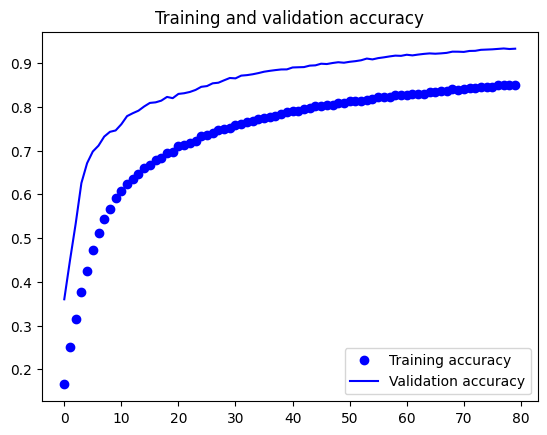

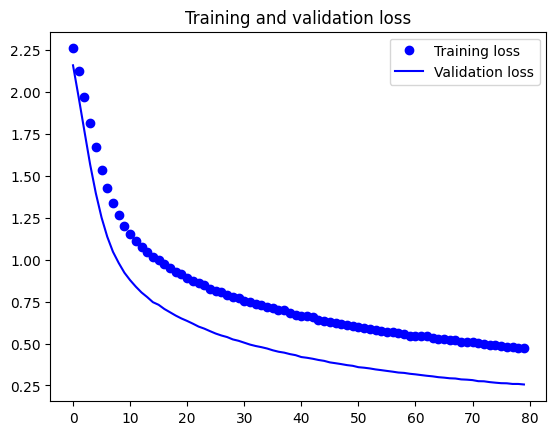

In [173]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [174]:
predicted_classes2 = sport_model.predict(test_X)

483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [175]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [176]:
predicted_classes.shape, test_Y.shape

((15426,), (15426,))

# Aprendamos de los errores: Qué mejorar

Found 14337 correct labels


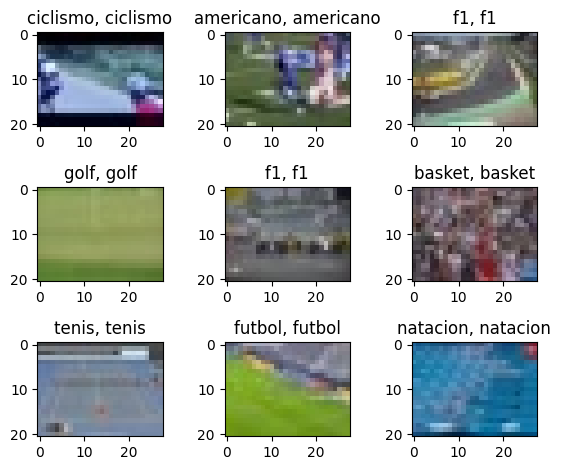

In [177]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 1089 incorrect labels


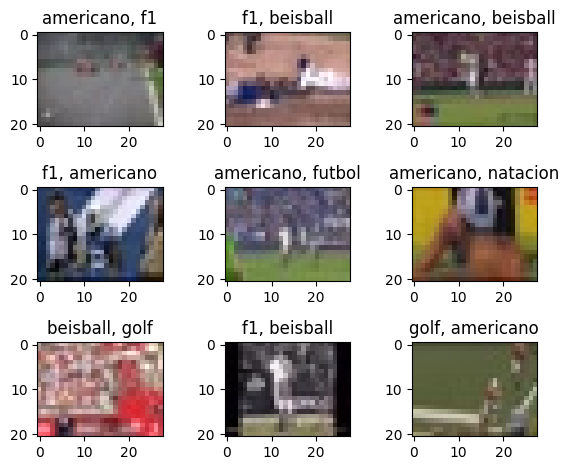

In [178]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [179]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.96      0.92      1975
     Class 1       0.95      0.91      0.93      1751
     Class 2       1.00      1.00      1.00      1797
     Class 3       0.99      0.97      0.98      1046
     Class 4       1.00      1.00      1.00      1491
     Class 5       0.92      0.88      0.90      1521
     Class 6       0.98      0.91      0.94      1522
     Class 7       0.79      0.87      0.83      1864
     Class 8       0.90      0.78      0.84      1031
     Class 9       0.95      0.98      0.96      1428

    accuracy                           0.93     15426
   macro avg       0.94      0.93      0.93     15426
weighted avg       0.93      0.93      0.93     15426



In [180]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['test/golf_0113.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
test/golf_0113.jpg golf
